In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

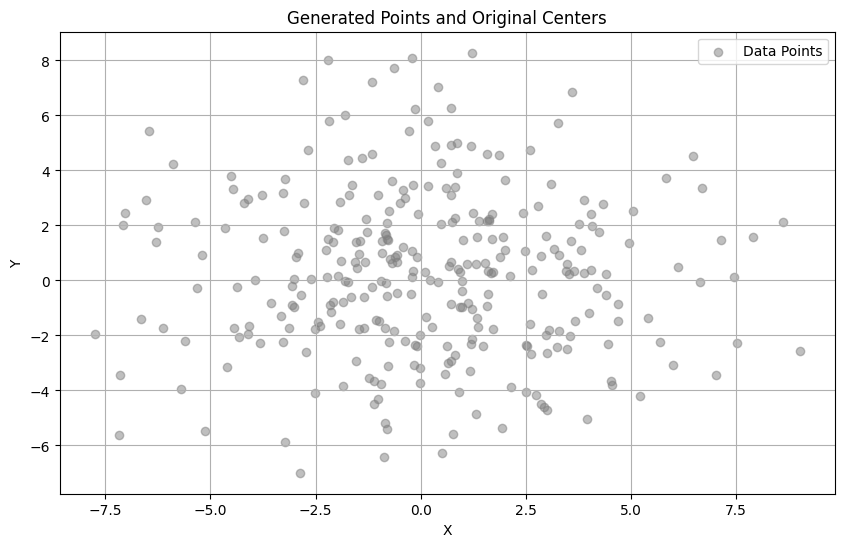

X shape: (300, 2)


In [72]:
def generate_points(n_samples=300):
    return np.random.randn(n_samples, 2) * 3

n_clusters = 3
X = generate_points()

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label='Data Points')
plt.title('Generated Points and Original Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
print(f"X shape: {X.shape}")

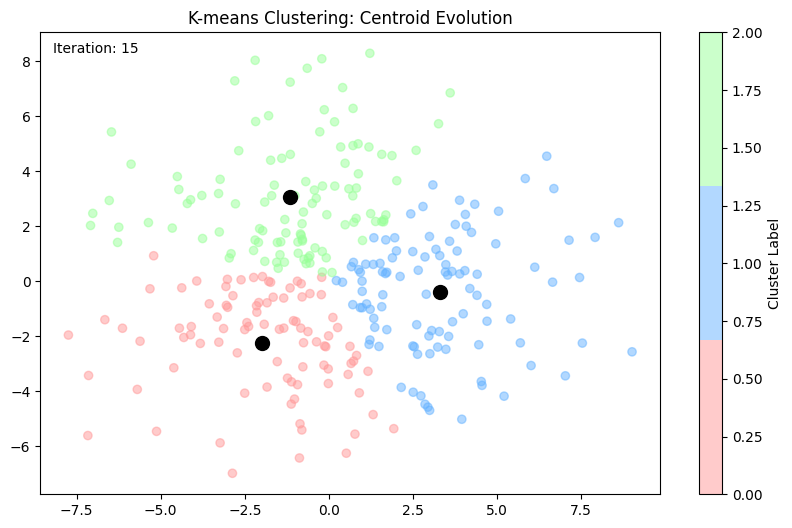

In [80]:
centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
centroids.shape


# Set up the plot
nice_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
cmap = ListedColormap(nice_colors[:n_clusters])
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=np.zeros(X.shape[0]), cmap=cmap, alpha=0.5, vmin=0, vmax=n_clusters-1)
centroid_plot, = ax.plot([], [], 'ko', markersize=10)
text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

def update(frame):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))


    labels = distances.argmin(axis=0)
    for i in range(n_clusters):
        centroids[i] = X[labels == i].mean(axis=0)
    centroid_plot.set_data(centroids[:, 0], centroids[:, 1])
    scatter.set_array(labels)
    text.set_text(f'Iteration: {frame + 1}')
    return scatter, centroid_plot, text

anim = FuncAnimation(fig, update, frames=15, init_func=lambda: (scatter, centroid_plot, text),
                     blit=True, repeat=False, interval=500)

plt.title('K-means Clustering: Centroid Evolution')
plt.colorbar(scatter, label='Cluster Label')
anim.save('kmeans_evolution.gif', writer='pillow', fps=2)
plt.show()